In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# Data Preprocessing

In [49]:
data = np.array(iris)
print(data[0:5,:])
nvar= data.shape[1]
datax = data[:,0:nvar-1]
datay = data[:,-1]

[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']]


In [50]:
print(datax[0:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]]


In [51]:
datax_scale = datax
for i in range(nvar-1):
    datax_scale[:,i]=(datax[:,i]-np.mean(datax[:,i]))/np.std(datax[:,i])

In [52]:
print(datax_scale[0:5,:])
print(np.mean(datax_scale[:,0]), np.std(datax_scale[:,0]))

[[-0.9006811702978099 1.0190043519716065 -1.3402265266227635
  -1.3154442950077407]
 [-1.1430169111851116 -0.1319794793216258 -1.3402265266227635
  -1.3154442950077407]
 [-1.3853526520724144 0.3284140531956675 -1.3970639535363667
  -1.3154442950077407]
 [-1.5065205225160663 0.09821728693702086 -1.2833890997091604
  -1.3154442950077407]
 [-1.0218490407414607 1.2492011182302531 -1.3402265266227635
  -1.3154442950077407]]
-1.6903145549918008e-15 0.9999999999999998


# k-Means Clustering

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', random_state=122)
kmeans.fit(datax_scale)
# 전처리된 data에 대해서 KMeans 함수를 사용할 수 있다.
#단 unsupervised이기 때문에 input 변수만 넣어야한다.

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

In [54]:
#center vector를 찾을 수 있다.
kmeans.cluster_centers_

array([[ 1.16743407,  0.14530299,  1.00302557,  1.0300019 ],
       [-0.01139555, -0.87600831,  0.37707573,  0.31115341],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

In [55]:
#cluster label도 찾을 수 있다.
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [56]:
# iris data set은 class label이 있기 때문에 적당히 숫자를 맞춰 넣어서 cluster label과 비교해본다.
datay_num = datay
datay_num[np.where(datay == 'setosa')] = 0
datay_num[np.where(datay == 'versicolor')] = 1
datay_num[np.where(datay =='virginica')] = 2

In [57]:
datay_num = np.array(datay_num, dtype=int)

In [58]:
y_compare = np.array([datay_num, kmeans.labels_])

In [59]:
y_compare
#눈으로 비교해 봤을 때도 clustering 을 통해 label을 하는 방식을 쓴다면
#현저히 성능이 떨어지는 것을 볼 수 있다.
#supervised learning과의 차이점이다.

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(datax_scale, kmeans.labels_)

#만약 unspervised dataset이 었다면 당연히 원 class label과 비교는 불가능하다.
#위와 같이 silhouette score를 통해서 clustering 자체의 성능만을 평가할 수 있다.

0.4630420362927048

# Hierarchical Clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [63]:
#single_clustering = AgglomerativeClustering(linkage='single',n_clusters=3).fit(datax)
complete_clustering=AgglomerativeClustering(linkage='complete', n_clusters=3).fit(datax)

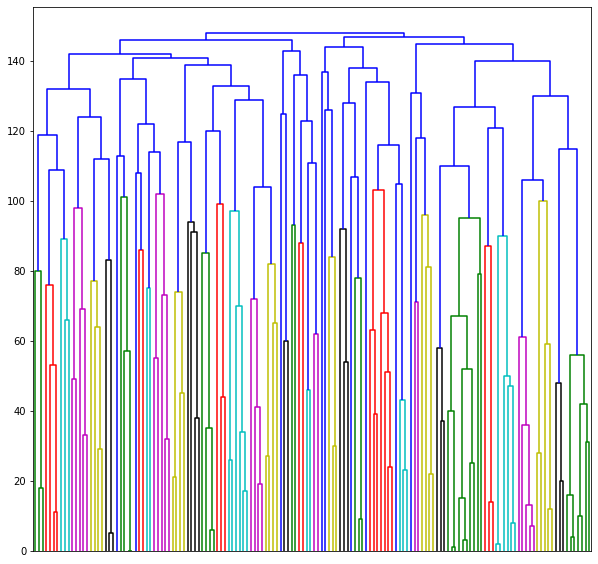

In [74]:
plt.figure(figsize=(10,10))

#Hierarchical Clustering의 자식 노드
children = complete_clustering.children_

#각 자식 노드간의 거리 정보를 가지고 있지 않기 때문에, 균일하게 그리도록 한다.
distance = np.arange(children.shape[0])

#각 클러스터 단계를 포함한 노드의 수 계산
no_of_observations = np.arange(2,children.shape[0]+2)

#덴드로그램을 그리기위한 연결 매트릭스를 생성
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

#덴드로그램을 그린다.
dendrogram(linkage_matrix, p = datax_scale.shape[0], labels = complete_clustering.labels_, show_contracted=True, no_labels = True, )

plt.show()